## Redes Neurais Artificiais 2025.2

- **Disciplina**: Redes Neurais Artificiais 2025.2
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

# Definição do problema

O seguinte trabalho visa resolver o problema de classificar a qualidade de rações caninas com base nos seus valores nutricionais.

# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Coleta e Análise Exploratória dos dados

####Importação da base de dados:

In [2]:
path = "/content/data_manuscript_dellanno_et_al.csv"

data = pd.read_csv(path)

####Visualização da base de dados:



In [3]:
data.head(10)

,municipality,breed (M=mix breed; P= pure breed),diagnosis date,sex & neuter status (FF=entire female; FS=sterilized female; MM=entire male; Ms=sterilized male),diagnosis,gruntzig,age,cod_location,location,age_class,Cd (ppm),Pb (ppm),x_coord,y_coord,COD_ISTAT_prov,COD_ISTAT_mun
0,AIROLE,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384490.78125,4858739.5,8,8001
1,ALBENGA,M,2020.0,FF,8140/0,Epitelial tumours,7.0,174.0,Mammary gland,5-8,0.647692,83.461538,434734.81250,4879254.5,9,9002
2,ALBENGA,M,2018.0,MM,9150/1,NaN,8.0,173.0,Skin,5-8,0.647692,83.461538,434734.81250,4879254.5,9,9002
3,ALBISOLA SUPERIORE,M,2021.0,MM,8800/3,Mesenchymal tumours,11.0,173.0,Skin,9-12,0.622500,86.333333,457724.87500,4912338.5,9,9004
4,ANDORA,M,2019.0,FF,8940/0,Mesenchymal tumours,20.0,174.0,Mammary gland,17-20,1.047875,110.500000,429801.59375,4870301.5,9,9006
5,BARDINETO,M,2019.0,MM,9120/3,Mesenchymal tumours,20.0,171.0,Soft tissue,17-20,0.465455,91.454545,431305.40625,4893266.5,9,9009
6,BARDINETO,P,2019.0,MM,9120/3,Mesenchymal tumours,20.0,171.0,Soft tissue,17-20,0.465455,91.454545,431305.40625,4893266.5,9,9009
7,BARGAGLI,P,2017.0,MM,8401/0,Epitelial tumours,20.0,175.0,Others,17-20,0.465000,96.500000,506884.68750,4920228.5,10,10003
8,BARGAGLI,M,2015.0,FF,8230/3,Epitelial tumours,10.0,174.0,Mammary gland,9-12,0.465000,96.500000,506884.68750,4920228.5,10,10003
9,BARGAGLI,M,2018.0,MS,8650/0,NaN,10.0,186.0,Penis and testicles,9-12,0.465000,96.500000,506884.68750,4920228.5,10,10003


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 16 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   municipality                                                                                      1765 non-null   object 
 1   breed (M=mix breed; P= pure breed)                                                                1765 non-null   object 
 2   diagnosis date                                                                                    1764 non-null   float64
 3   sex & neuter status (FF=entire female; FS=sterilized female; MM=entire male; Ms=sterilized male)  1764 non-null   object 
 4   diagnosis                                                                                         1764 non-null   object 
 5  

**Análise**  
O dataset possui 15 variáveis, descritas a seguir:  
| Variável | Descrição | Tipo
| :--- | :---: | ---: |
| municipality | Município onde o animal foi registrado | Categórica nominal |
| breed | Raça do cachorro, onde P = raça pura; M = raça mista | Categórica binária |
| diagnosis date | Ano do diagnóstico | Temporal |
| sex & neuter status | Sexo e status de castração, onde FF = Fêmea fértil; FS = Fêmea esterilizada; MF = Macho fértil; MS = Macho esterilizado | Categórica nominal |
| diagnosis | Código ICD-O-3 do diagnóstico | Categórica nominal |
| gruntzig | Categoria do tumor com base no tecido de origem, usando a Classificação de Gruntzig | Categórica nominal |
| age | Idade do animal | Quantitativa contínua |
| cod_location | Código da localização anatômica do tumor | Categórica nominal |
| location | Região anatômica onde o tumor foi encontrado | Categórica nominal |
| age_class | Idade do animal categorizada em classes (0-4, 5-8, 9-12, 13-16, 17-20) | Categórica ordinal |
| Cd (ppm) | Concentração de cádmio na amostra em parte por milhão | Quantitativa contínua |
| Pb (ppm) | Concentração de chumbo na amostra em partes por milhão | Quantitativa contínua |
| x_coord | Coordenada x da coleta | Quantitativa contínua |
| y_coord | Coordenada y da coleta | Quantitativa contínua |
| COD_ISTAT_prov | Código da província segundo o Istituto Nazionale di Statistica | Categórica nominal |
| COD_ISTAT_mun | Código do município segundo o Istituto Nazionale di Statistica | Categórica nominal |

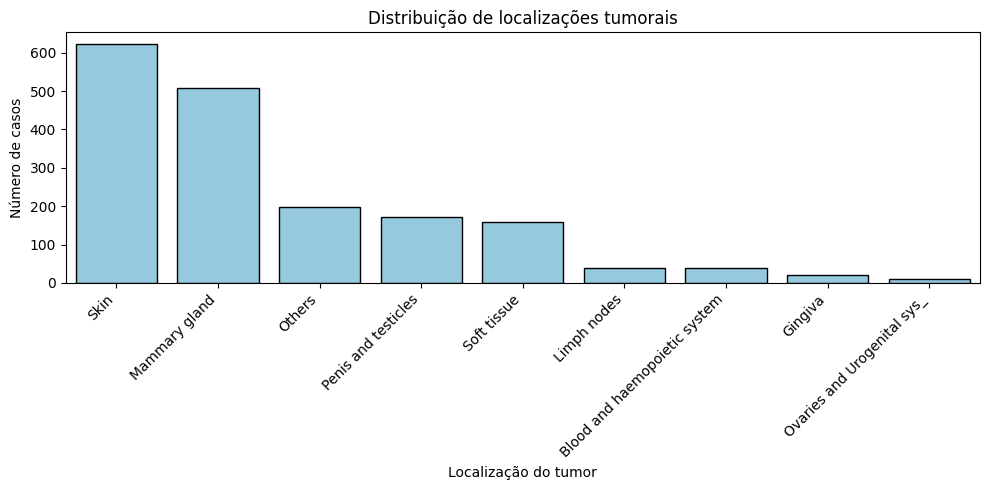

In [73]:
#distribuição da localização dos tumores
loc_counts = data['location'].value_counts()

plt.figure(figsize=(10, 5))

sns.barplot(x=loc_counts.index, y=loc_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição de localizações tumorais')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Localização do tumor')
plt.ylabel('Número de casos')

plt.tight_layout()
plt.show()

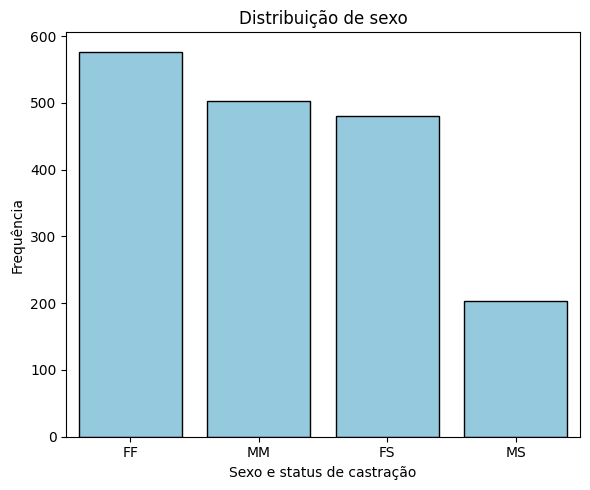

In [72]:
#distribuição de sexo
sex_counts = data['sex & neuter status (FF=entire female; FS=sterilized female; MM=entire male; Ms=sterilized male)'].value_counts()

plt.figure(figsize=(6, 5))

sns.barplot(x=sex_counts.index, y=sex_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição de sexo')
plt.xlabel('Sexo e status de castração')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

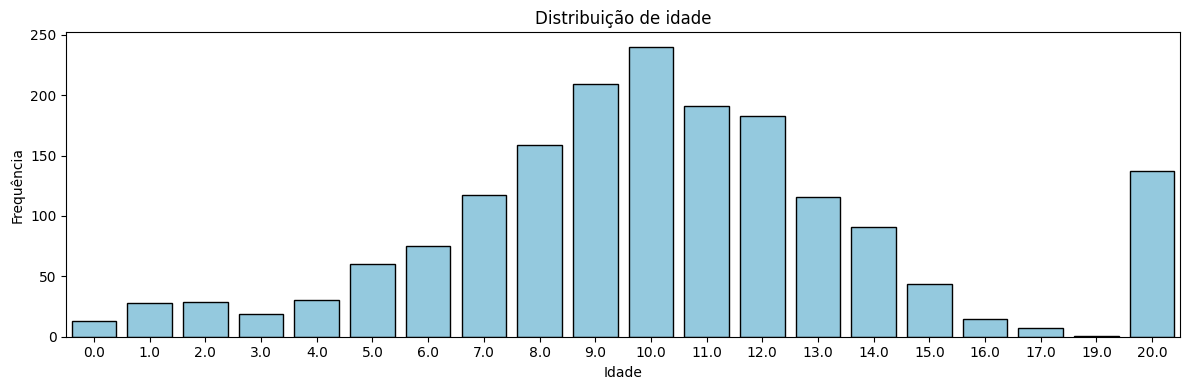

In [71]:
#distribuição de idade
age_counts = data['age'].value_counts()

plt.figure(figsize=(12, 4))

sns.barplot(x=age_counts.index, y=age_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribuição de idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

####Verificação de dados faltantes

In [21]:
print(f"Numero de dados faltantes: \n{data.isnull().sum()}")

Numero de dados faltantes: 
municipality                                                                                          0
breed (M=mix breed; P= pure breed)                                                                    0
diagnosis date                                                                                        1
sex & neuter status (FF=entire female; FS=sterilized female; MM=entire male; Ms=sterilized male)      1
diagnosis                                                                                             1
gruntzig                                                                                            690
age                                                                                                   1
cod_location                                                                                          1
location                                                                                              1
age_class                           

**Análise**  
O dataset possui pouquíssimos dados faltantes, com exceção da coluna *gruntzig*, com aproximadamente 39% de dados nulos. Entretanto, tendo em vista que, a Classificação de Gruntzig fornece o tipo histológico do tumor, dando uma visão geral da localização, e a coluna *location* fornece uma visão mais específica da localização do tumor, retornando a região anatômica, e que não possui dados faltantes, a coluna *gruntzig* poderia ser desconsiderada nessa tarefa.

####Verificação de outliers

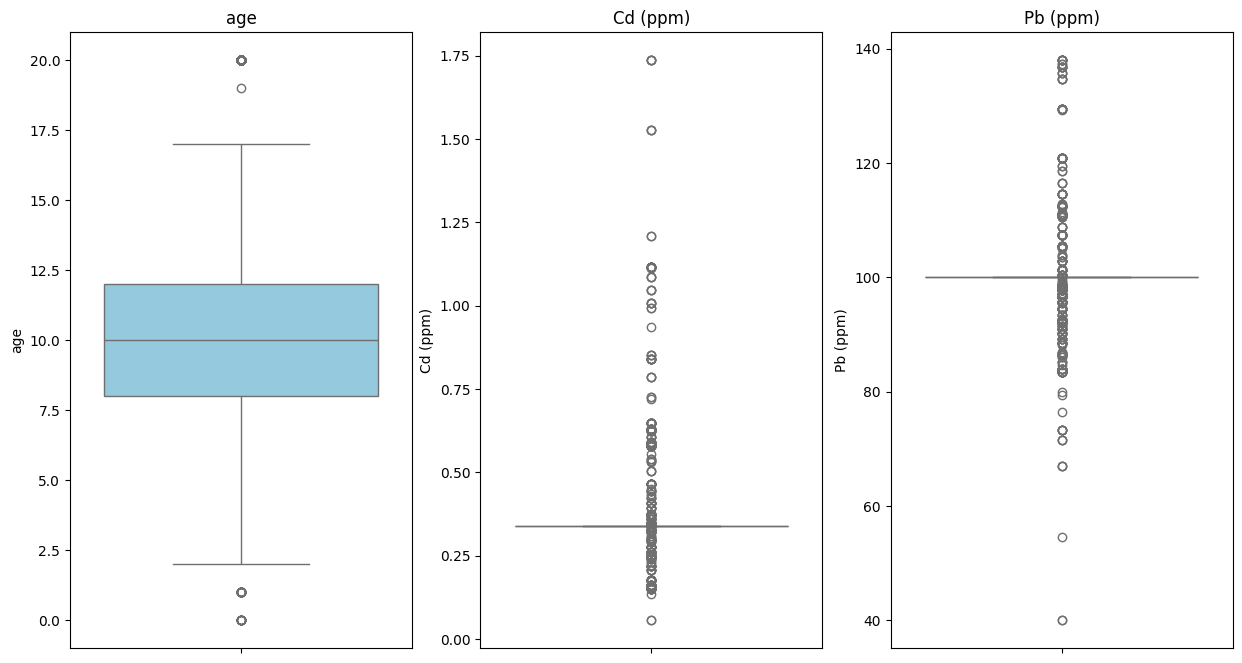

In [30]:
#outliers das variáveis quantitativas
qttv_columns = ['age', 'Cd (ppm)', 'Pb (ppm)']

plt.figure(figsize=(15, 8))

for i, col in enumerate(qttv_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)

plt.show()

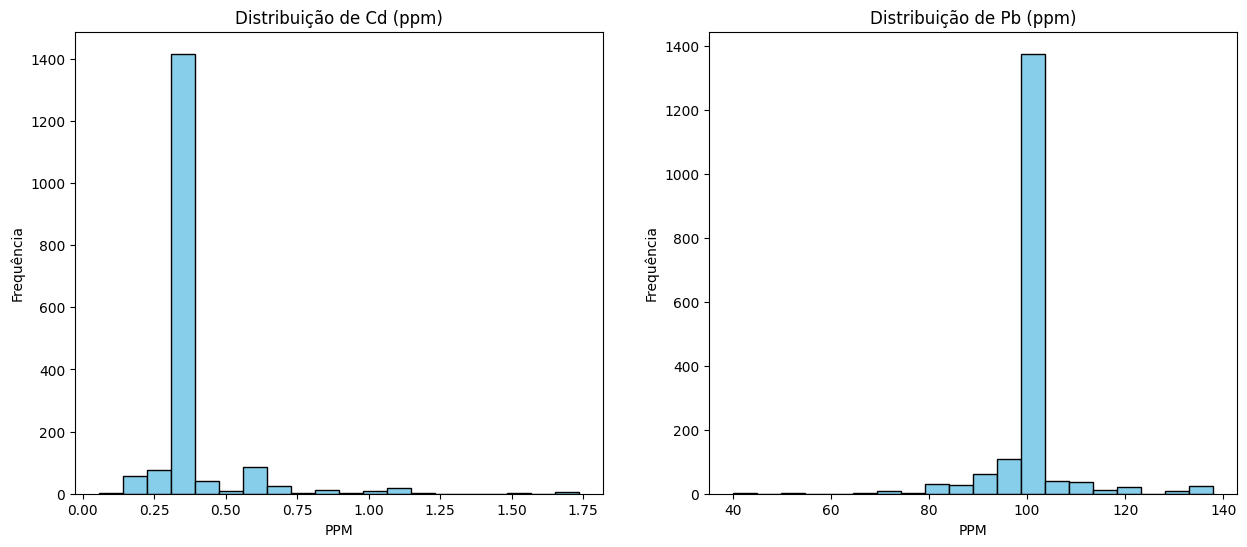

In [38]:
#distribuição dos valores de ppm
ppm_columns = ['Cd (ppm)', 'Pb (ppm)']

plt.figure(figsize=(15, 6))

for i, col in enumerate(ppm_columns, 1):
  plt.subplot(1, 2, i)
  plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
  plt.title(f'Distribuição de {col}')
  plt.xlabel('PPM')
  plt.ylabel('Frequência')

plt.show()

In [33]:
#checando valores de quartis
data[['Cd (ppm)','Pb (ppm)']].describe()

,Cd (ppm),Pb (ppm)
count,1764.000000,1764.000000
mean,0.373340,100.191038
std,0.152726,7.367476
min,0.056250,40.000000
25%,0.339861,100.046243
50%,0.339861,100.046243
75%,0.339861,100.046243
max,1.736200,138.000000


**Análise**  
As variáveis quantitativas, com exceção da idade, possuem muitos outliers e nenhum quartil visível. Isso poderia indicar (1) que as colunas possuem muitos dados nulos, o que é falso, segundo a análise já feita, ou (2) que a distribuição de valores está muito concentrada, o que é confirmado pelo histograma e cálculo dos quartis.

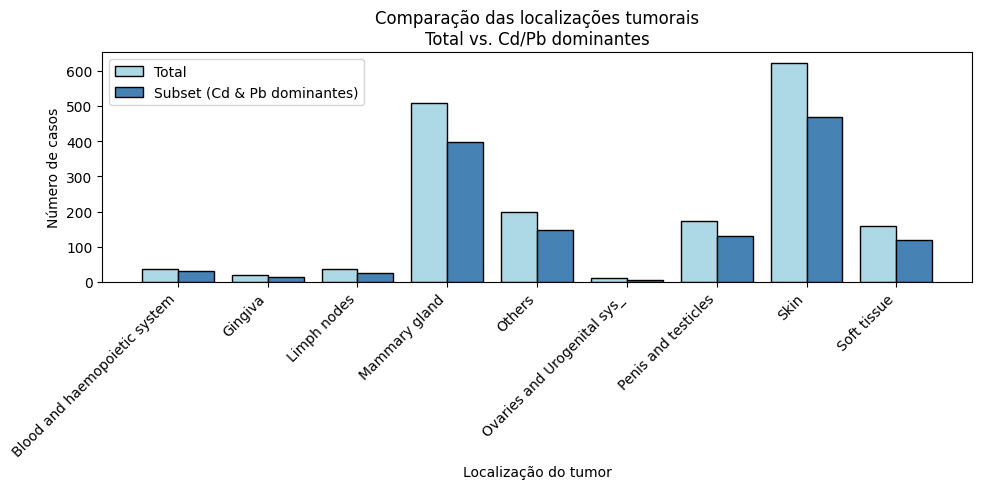

In [67]:
#coletando os valores concentrados
cd_mode = data['Cd (ppm)'].mode()[0]
pb_mode = data['Pb (ppm)'].mode()[0]

#relacionando a localização dos tumores
subset = data[(data['Cd (ppm)'] == cd_mode) & (data['Pb (ppm)'] == pb_mode)]
location_counts = subset['location'].value_counts()

#loc_counts foi definido no início da análise, considera todos os valores de Cd e Pb

#unindo os dois
comparison = pd.DataFrame({'Data': loc_counts, 'Subset': location_counts}).fillna(0)

#plotando
x = np.arange(len(comparison))
width = 0.4 #largura da barra

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, comparison['Data'], width, label='Total', color='lightblue', edgecolor='black')
plt.bar(x + width/2, comparison['Subset'], width, label='Subset (Cd & Pb dominantes)', color='steelblue', edgecolor='black')

plt.title('Comparação das localizações tumorais\nTotal vs. Cd/Pb dominantes')
plt.xticks(x, comparison.index, rotation=45, ha='right')
plt.xlabel('Localização do tumor')
plt.ylabel('Número de casos')

plt.legend()
plt.tight_layout()
plt.show()


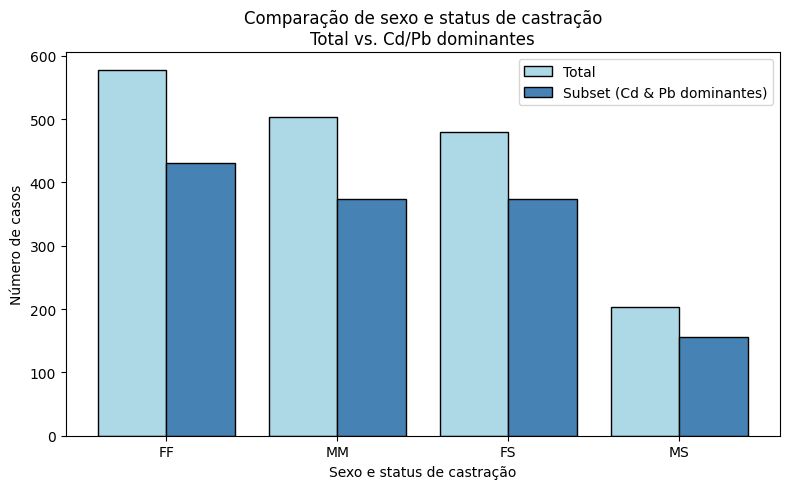

In [69]:
#influencia do ppm por sexo
sexo_counts = subset['sex & neuter status (FF=entire female; FS=sterilized female; MM=entire male; Ms=sterilized male)'].value_counts()

#sex_counts foi definido no início da análise, considera todos os valores de Cd e Pb

#unindo
comparison_sex = pd.DataFrame({'Data': sex_counts, 'Subset': sexo_counts}).fillna(0)

#plotando
x = np.arange(len(comparison_sex))
width = 0.4 #largura da barra

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, comparison_sex['Data'], width, label='Total', color='lightblue', edgecolor='black')
plt.bar(x + width/2, comparison_sex['Subset'], width, label='Subset (Cd & Pb dominantes)', color='steelblue', edgecolor='black')

plt.title('Comparação de sexo e status de castração\nTotal vs. Cd/Pb dominantes')
plt.xticks(x, comparison_sex.index)
plt.xlabel('Sexo e status de castração')
plt.ylabel('Número de casos')

plt.legend()
plt.tight_layout()
plt.show()

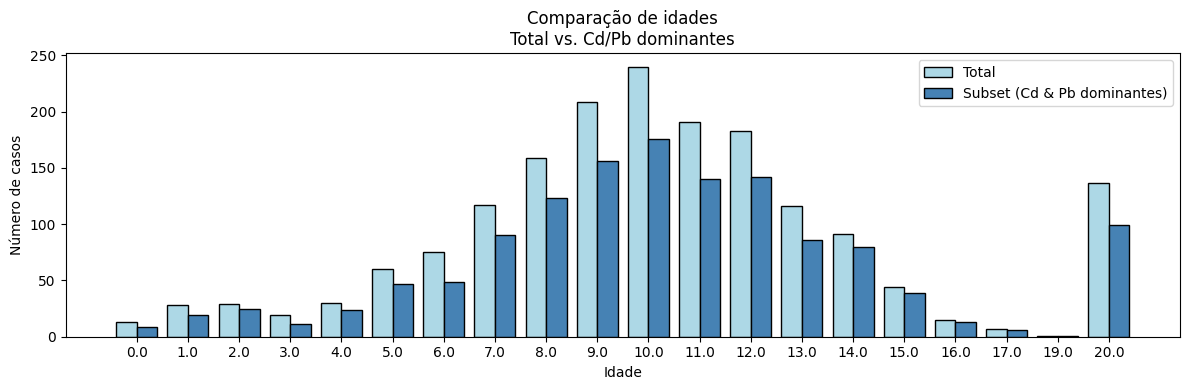

In [70]:
#influencia do ppm por idade
idade_counts = subset['age'].value_counts()

#age_counts foi definido no início da análise, considera todos os valores de Cd e P

#combinando
comparison_age = pd.DataFrame({'Data': age_counts, 'Subset': idade_counts}).fillna(0)

#plotando
x = np.arange(len(comparison_age))
width = 0.4 #largura da barra

plt.figure(figsize=(12, 4))
plt.bar(x - width/2, comparison_age['Data'], width, label='Total', color='lightblue', edgecolor='black')
plt.bar(x + width/2, comparison_age['Subset'], width, label='Subset (Cd & Pb dominantes)', color='steelblue', edgecolor='black')

plt.title('Comparação de idades\nTotal vs. Cd/Pb dominantes')
plt.xticks(x, comparison_age.index)
plt.xlabel('Idade')
plt.ylabel('Número de casos')

plt.legend()
plt.tight_layout()
plt.show()

**Análise**  
A distribuição comparando todos os possíveis valores de Cd e Pb (Total) e os valores concentrados (Subset) mostram que ambos seguem a mesma proporção, ou seja, as variáveis possuem pouca ou nenhuma inflûencia sobre a localização do tumor, sexo ou idade afetada. Essa análise parece contraditória com a conclusão do artigo que originou o dataset, que afirmava que as variáveis ambientais tinham impacto na localização do tumor.

# 2. Preparação dos dados

# 3. Determinação da tarefa de Aprendizado de Máquina

# 4. Determinação da abordagem de validação cruzada

Justificativa que corrobore com a situação:

## 4.1. Determinação das Métricas de desempenho

Justificativa que corrobore com a situação:

# 5. Elaboração da Grade de busca

Justificativa

## 5.1. Definição dos Parâmetros

Justificativa

## 5.2. Definição dos Hiperparâmetros

Justificativa

# 6. Treinamento dos modelos

## 6.1. Testando os modelos

# 7. Análise de desempenho dos modelos

## 7.1. Análise Quantitativa

## 7.2. Análise Qualitativa